<a href="https://colab.research.google.com/github/Chulika1711/AI-ML-Internship/blob/main/Dimensionality_reduction_using_PCA(TASK_11).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Principal Component Analysis (PCA) is a dimensionality reduction technique widely used in data analysis and machine learning. It aims to reduce the number of variables (or features) in a dataset while preserving the most important information.**



If we feed our model with an excessively large dataset (with a large no. of features/columns), it gives rise to the problem of overfitting, wherein the model starts getting influenced by outlier values and noise. This is called the Curse of Dimensionality. Dimensionality Reduction is a statistical/ML-based technique wherein we try to reduce the number of features in our dataset and obtain a dataset with an optimal number of dimensions.

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

 Principal Component Analysis is a technique of feature extraction that maps a higher dimensional feature space to a lower-dimensional feature space. While reducing the number of dimensions, PCA ensures that maximum information of the original dataset is retained in the dataset with the reduced no. of dimensions and the co-relation between the newly obtained Principal Components is minimum.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
df=pd.read_csv('/content/drive/MyDrive/segmentation data.csv')

Mounted at /content/drive


In [ ]:
print(df.head())  # Display the first few rows

          ID  Sex  Marital status  Age  Education  Income  Occupation  \
0  100000001    0               0   67          2  124670           1   
1  100000002    1               1   22          1  150773           1   
2  100000003    0               0   49          1   89210           0   
3  100000004    0               0   45          1  171565           1   
4  100000005    0               0   53          1  149031           1   

   Settlement size  
0                2  
1                2  
2                0  
3                1  
4                1  


In [ ]:
print(df.info())  # Display information about columns and data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   ID               2000 non-null   int64
 1   Sex              2000 non-null   int64
 2   Marital status   2000 non-null   int64
 3   Age              2000 non-null   int64
 4   Education        2000 non-null   int64
 5   Income           2000 non-null   int64
 6   Occupation       2000 non-null   int64
 7   Settlement size  2000 non-null   int64
dtypes: int64(8)
memory usage: 125.1 KB
None


In [ ]:
df.isnull().sum()

ID                 0
Sex                0
Marital status     0
Age                0
Education          0
Income             0
Occupation         0
Settlement size    0
dtype: int64

In [ ]:
df.columns

Index(['ID', 'Sex', 'Marital status', 'Age', 'Education', 'Income',
       'Occupation', 'Settlement size'],
      dtype='object')

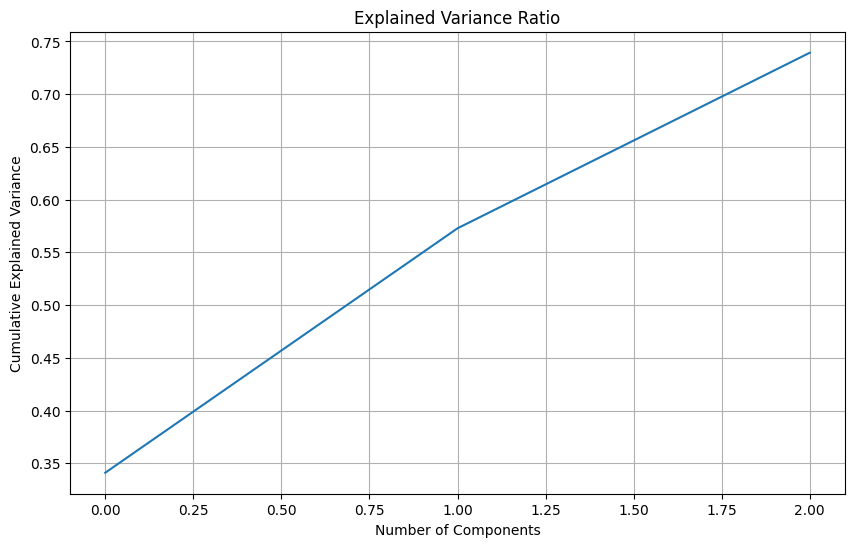

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


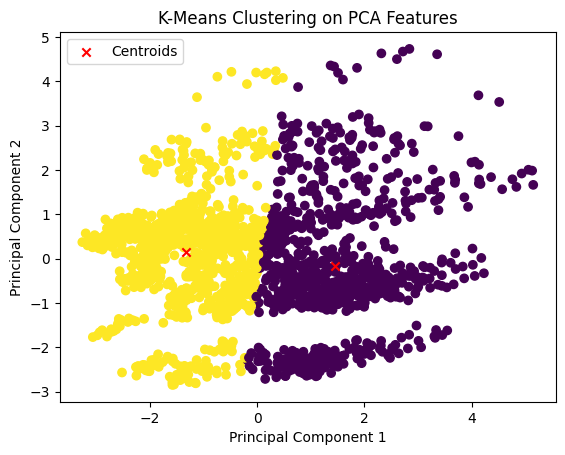

In [ ]:
# Dimensionality Reduction using PCA
# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

# Implement PCA
pca = PCA(n_components=3)  # Choose the number of components
pca.fit(scaled_data)

# Visualize explained variance ratio
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance Ratio')
plt.grid(True)
plt.show()

# Choose the number of principal components to retain based on explained variance ratio
# Transform the data
n_components = 2  # Choose the number of components
pca = PCA(n_components=n_components)
pca_data = pca.fit_transform(scaled_data)

# K-Means Clustering on PCA Features
# Choose the number of clusters
# Apply K-Means clustering algorithm
kmeans = KMeans(n_clusters=2)  # Choose the number of clusters
kmeans.fit(pca_data)

# Visualize clustered data
# For 2D visualization
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=kmeans.labels_, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='x', color='red', label='Centroids')
plt.title('K-Means Clustering on PCA Features')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()